In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats



TSFB=pd.read_csv('/Users/kyleblack/Desktop/Capstone1/Data/Pitches/2SFB.csv')

In [18]:
x =TSFB
def cleandata(dat):
    
    xR=dat[['pitch_type','release_speed','release_pos_x','release_pos_z','launch_speed','launch_angle','release_spin_rate','events']]
    xR1=xR[xR['launch_angle'].notnull()]
    xR2 =xR1[xR1['launch_speed'].notnull()]
    xR3 = xR2[xR2['release_spin_rate'].notnull()]
    xR4 = xR3[xR3['release_speed'].notnull()]
    
    return xR4
cd= cleandata(x)
cd


,pitch_type,release_speed,release_pos_x,release_pos_z,launch_speed,launch_angle,release_spin_rate,events
0,FT,101.9,-2.50,5.91,81.8,-2.0,2154.0,field_out
1,FT,100.9,-1.57,5.45,87.0,46.0,2220.0,field_out
2,FT,100.7,-1.52,5.43,63.5,19.0,2296.0,single
3,FT,100.6,-2.27,6.40,100.4,0.0,2227.0,field_out
4,FT,100.5,-2.39,6.21,105.1,-2.0,2167.0,single
...,...,...,...,...,...,...,...,...
12767,FT,80.5,3.27,5.34,84.7,32.0,2201.0,sac_fly
12768,FT,80.3,3.37,5.28,94.1,26.0,2245.0,sac_fly
12769,FT,79.5,-1.90,5.75,109.9,5.0,1857.0,single
12770,FT,76.3,-2.03,5.86,97.4,2.0,1720.0,field_out


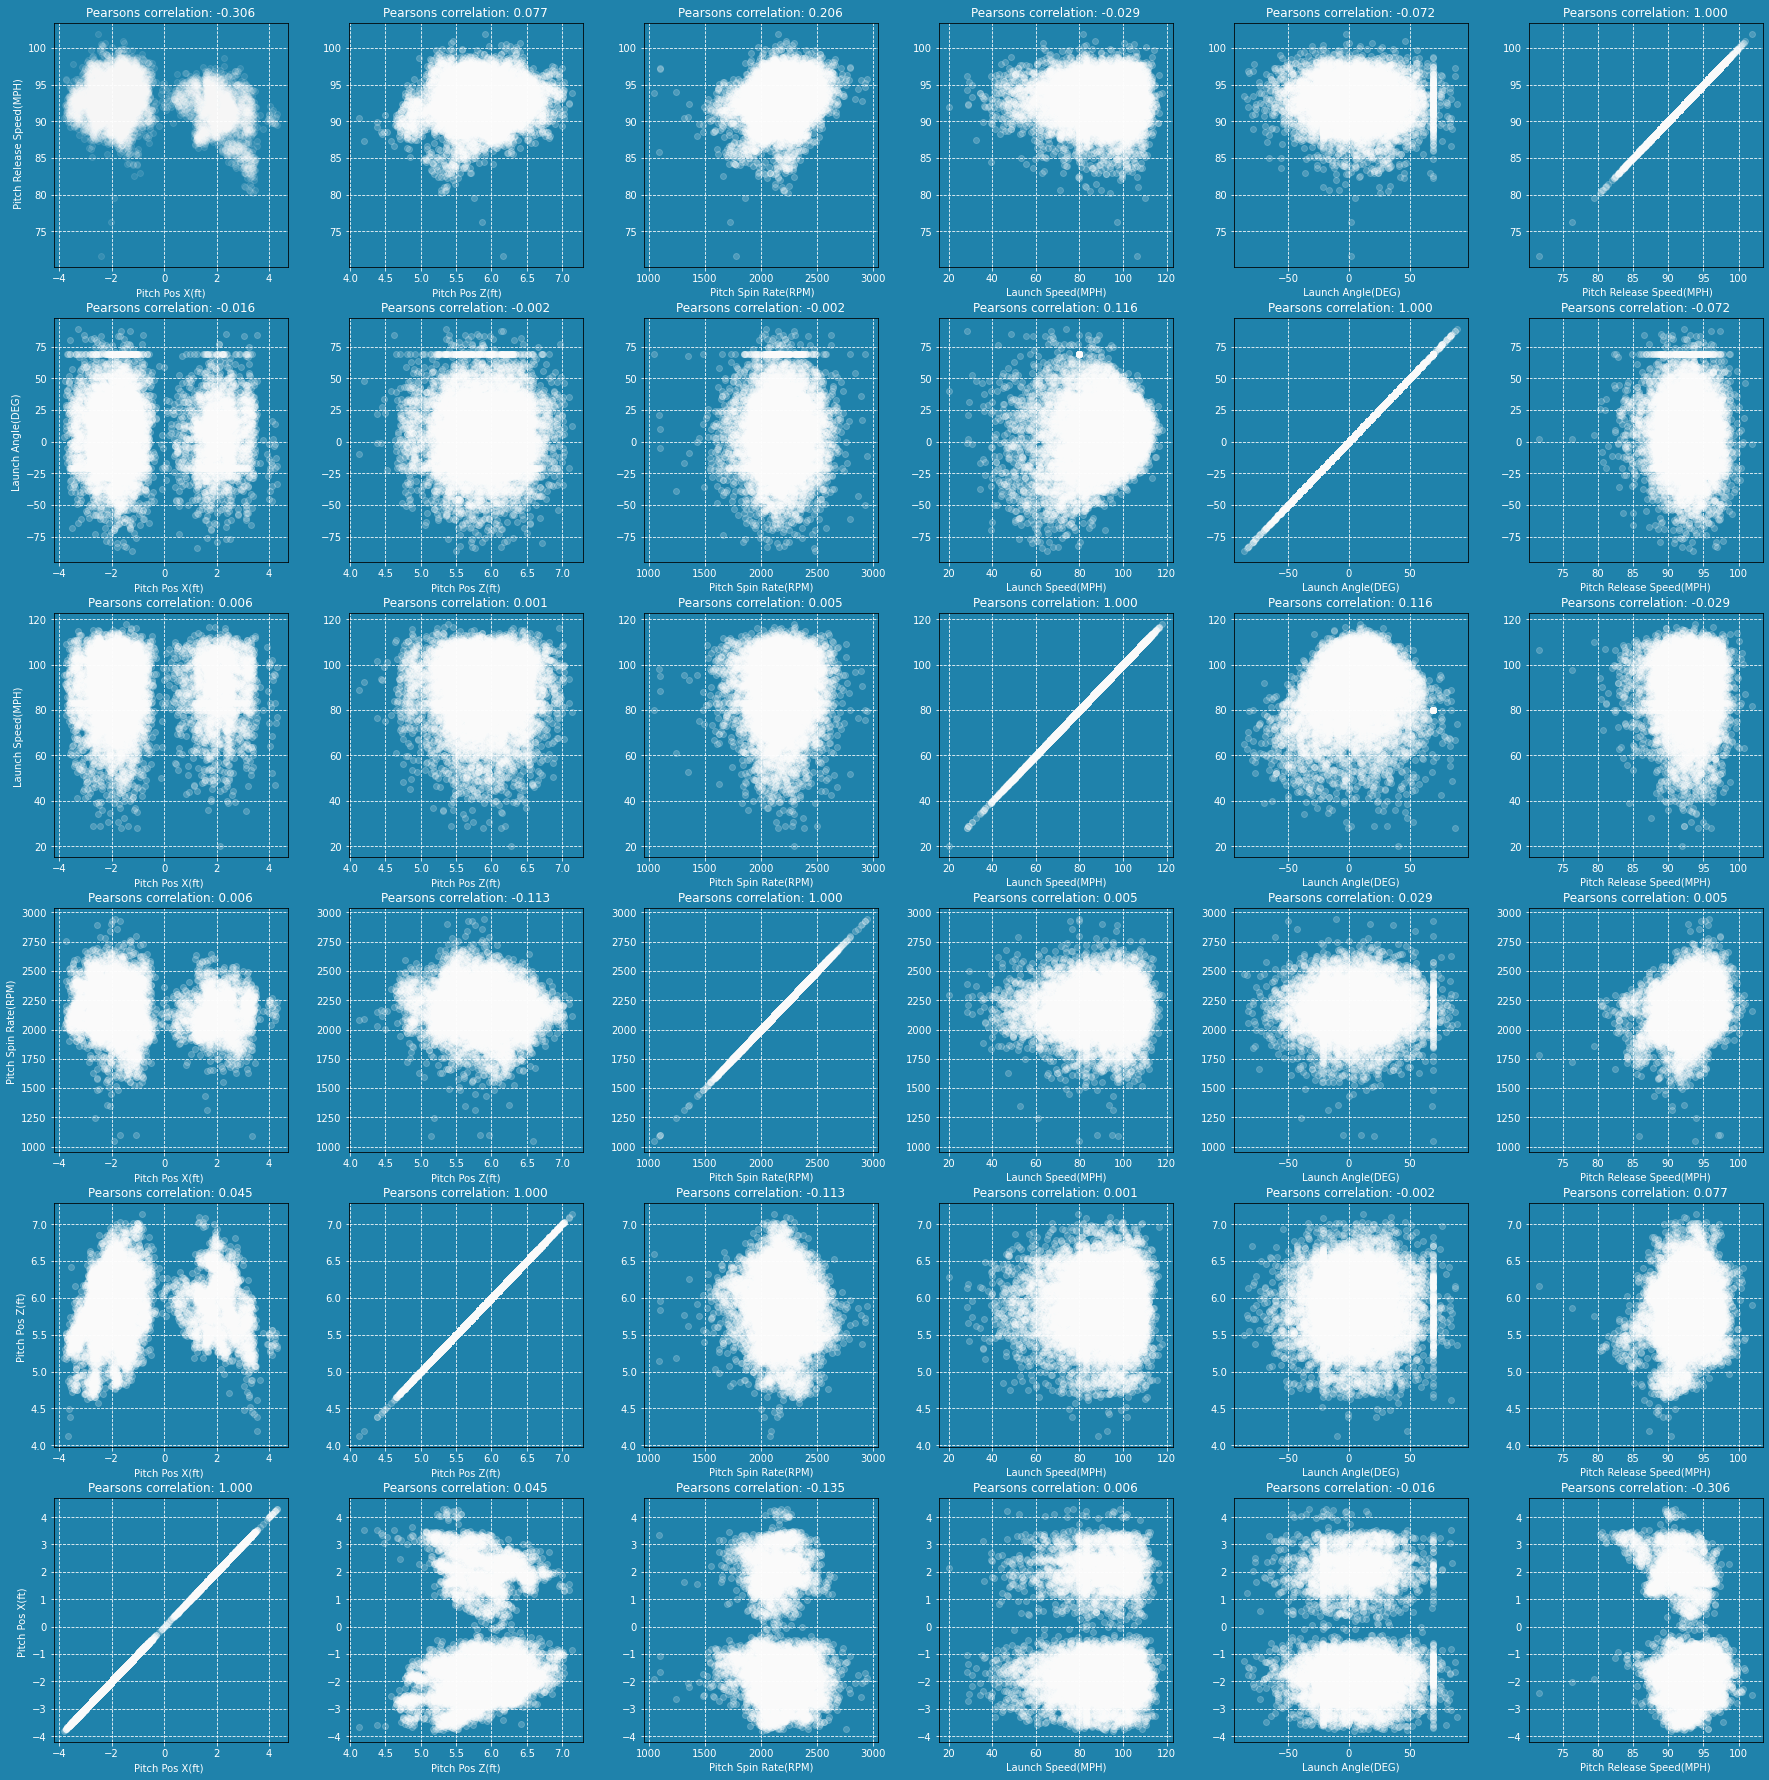

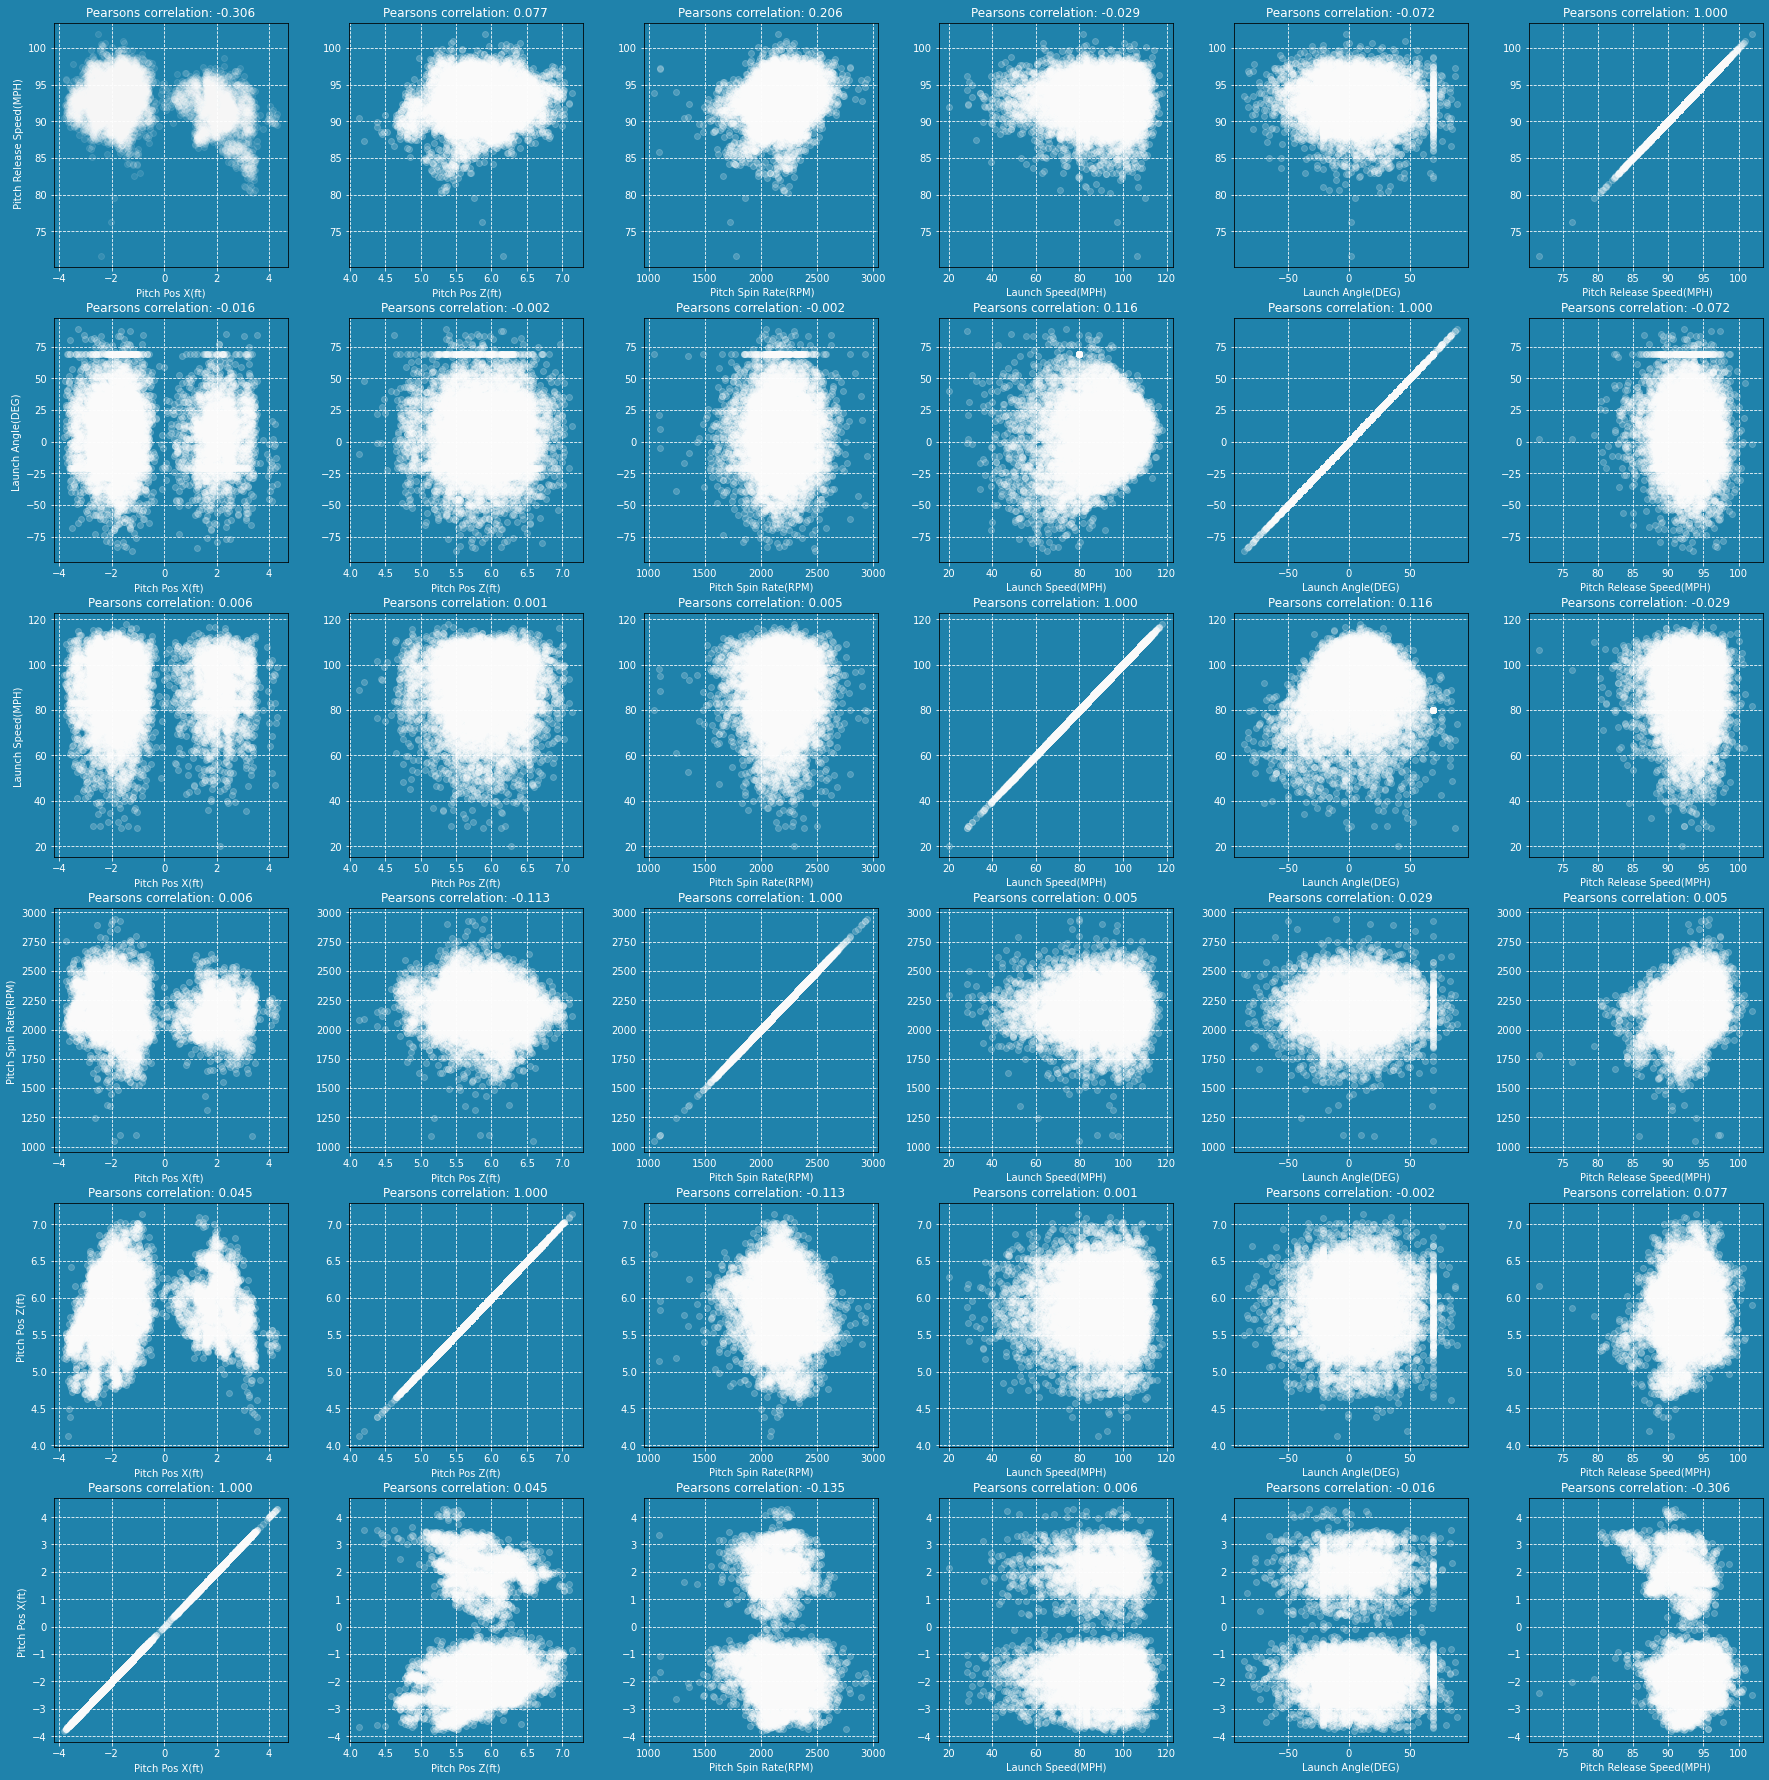

In [16]:
from scipy.stats import pearsonr
def scatter_data(clean_data):
    
    group = clean_data["events"]
    
    release_speed = clean_data["release_speed"]
    release_speed_std = np.std(release_speed)
    release_speed_mean= np.mean(release_speed)
    
    
    xpos_x =clean_data["release_pos_x"]
    xpos_x_std = np.std(xpos_x)
    xpos_x_mean= np.mean(xpos_x)
    
    
    
    xpos_z = clean_data["release_pos_z"]
    
    xpos_z_std = np.std(xpos_z)
    xpos_z_mean= np.mean(xpos_z)
    
    
    
    
    release_spin_rate = clean_data["release_spin_rate"]
    
    
    release_spin_rate_std = np.std(release_spin_rate)
    release_spin_rate_mean= np.mean(release_spin_rate)
    
    
    
    
    launch_speed = clean_data['launch_speed']
    
    launch_speed_std = np.std(launch_speed)
    launch_speed_mean= np.mean(launch_speed)
    
    
    launch_angle = clean_data['launch_angle']
    
    launch_angle_std = np.std(launch_angle)
    launch_angle_mean= np.mean(launch_angle)
    
    
    release_spin_rate = clean_data['release_spin_rate']
    
    release_spin_rate_std = np.std(release_spin_rate)
    release_spin_rate_mean= np.mean(release_spin_rate)
    
    
    
    
    
    color_palate=['#1f82ab','#7FEBB0', '#EBA173','#3E699E','#67A2E']
    
    fig, ax = plt.subplots(6,6, figsize= (25,25))
    #cont_color = {'field_out':'red','single':'blue','sac_fly':'green', 'double':'purple', 'triple':'orange', 'home_run':"white"    }
    fig.tight_layout(pad=3.0)
    fig.set_facecolor(color_palate[0])
    
    #covairance1 =np.cov(xpos_x,release_speed)
    #Pearson1 = covairance1 / (xpos_x_std * release_speed_std)
    corr1, _1 = pearsonr(xpos_x,release_speed )
    ax[0,0].set_title('Pearsons correlation: %.3f' % corr1, color ='white')
    ax[0,0].tick_params(axis='x', colors='white')
    ax[0,0].tick_params(axis='y', colors='white')
    ax[0,0].scatter(xpos_x,release_speed,alpha=.1, color= 'white')
    ax[0,0].set_facecolor(color_palate[0])
    #ax[0].set_title("Pitch Pos X to Pitch Release Speed", fontsize = 8, color="white")
    ax[0,0].set_ylabel(" Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[0,0].set_xlabel("Pitch Pos X(ft)", fontsize=10, color="white")
    ax[0,0].grid(True,color="white",linestyle= '--')
    
    corr2, _2 = pearsonr(xpos_z,release_speed )
    ax[0,1].set_title('Pearsons correlation: %.3f' % corr2, color ='white')
    ax[0,1].tick_params(axis='x', colors='white')
    ax[0,1].set_xlabel(" Pitch Pos Z(ft)", fontsize=10, color="white")
    ax[0,1].tick_params(axis='y', colors='white')
    ax[0,1].scatter(xpos_z,release_speed, alpha=.2,color="white")
    ax[0,1].set_facecolor(color_palate[0])
    ax[0,1].grid(True,color="white", linestyle= '--')
    
    corr3, _3 = pearsonr(release_spin_rate,release_speed )
    ax[0,2].set_title('Pearsons correlation: %.3f' % corr3, color ='white')
    ax[0,2].tick_params(axis='x', colors='white')
    ax[0,2].set_xlabel(" Pitch Spin Rate(RPM)", fontsize=10, color="white")
    ax[0,2].tick_params(axis='y', colors='white')
    ax[0,2].scatter(release_spin_rate,release_speed, alpha=.2,color="white")
    ax[0,2].set_facecolor(color_palate[0])
    ax[0,2].grid(True,color="white", linestyle= '--')
    
    
    corr4, _4 = pearsonr(launch_speed,release_speed )
    ax[0,3].set_title('Pearsons correlation: %.3f' % corr4, color ='white')
    ax[0,3].tick_params(axis='x', colors='white')
    ax[0,3].set_xlabel("Launch Speed(MPH)", fontsize=10, color="white")
    ax[0,3].tick_params(axis='y', colors='white')
    ax[0,3].scatter(launch_speed,release_speed, alpha=.2,color="white")
    ax[0,3].set_facecolor(color_palate[0])
    ax[0,3].grid(True,color="white", linestyle= '--')
    
    
    corr5, _5 = pearsonr(launch_angle,release_speed )
    ax[0,4].set_title('Pearsons correlation: %.3f' % corr5, color ='white')
    ax[0,4].tick_params(axis='x', colors='white')
    ax[0,4].set_xlabel(" Launch Angle(DEG)", fontsize=10, color="white")
    ax[0,4].tick_params(axis='y', colors='white')
    ax[0,4].scatter(launch_angle,release_speed, alpha=.2,color="white")
    ax[0,4].set_facecolor(color_palate[0])
    ax[0,4].grid(True,color="white", linestyle= '--')
   
    
    corr6, _6 = pearsonr(release_speed,release_speed )
    ax[0,5].set_title('Pearsons correlation: %.3f' % corr6, color ='white')
    ax[0,5].tick_params(axis='x', colors='white')
    ax[0,5].set_xlabel(" Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[0,5].tick_params(axis='y', colors='white')
    ax[0,5].scatter(release_speed,release_speed, alpha=.2,color="white")
    ax[0,5].set_facecolor(color_palate[0])
    ax[0,5].grid(True,color="white", linestyle= '--')
    
    
    
    
    
    
    corr7, _7 = pearsonr(xpos_x,launch_angle)
    ax[1,0].set_title('Pearsons correlation: %.3f' % corr7, color ='white')
    ax[1,0].set_ylabel("Launch Angle(DEG) ", fontsize=10, color="white")
    ax[1,0].tick_params(axis='x', colors='white')
    ax[1,0].set_xlabel("Pitch Pos X(ft) ", fontsize=10, color="white")
    ax[1,0].tick_params(axis='y', colors='white')
    ax[1,0].scatter(xpos_x,launch_angle, alpha=.2,color="white")
    ax[1,0].set_facecolor(color_palate[0])
    ax[1,0].grid(True,color="white", linestyle= '--')
    
    
    
    corr8, _8 = pearsonr(xpos_z,launch_angle)
    ax[1,1].set_title('Pearsons correlation: %.3f' % corr8, color ='white')
    ax[1,1].tick_params(axis='x', colors='white')
    ax[1,1].set_xlabel("Pitch Pos Z(ft)", fontsize=10, color="white")
    ax[1,1].tick_params(axis='y', colors='white')
    ax[1,1].scatter(xpos_z,launch_angle, alpha=.2,color="white")
    ax[1,1].set_facecolor(color_palate[0])
    ax[1,1].grid(True,color="white", linestyle= '--')
    
    corr9, _9 = pearsonr(release_spin_rate,launch_angle)
    ax[1,2].set_title('Pearsons correlation: %.3f' % corr8, color ='white')
    ax[1,2].tick_params(axis='x', colors='white')
    ax[1,2].set_xlabel("Pitch Spin Rate(RPM)", fontsize=10, color="white")
    ax[1,2].tick_params(axis='y', colors='white')
    ax[1,2].scatter(release_spin_rate,launch_angle, alpha=.2,color="white")
    ax[1,2].set_facecolor(color_palate[0])
    ax[1,2].grid(True,color="white", linestyle= '--')
    
    
    corr10, _10 = pearsonr(launch_speed,launch_angle)
    ax[1,3].set_title('Pearsons correlation: %.3f' % corr10, color ='white')
    ax[1,3].tick_params(axis='x', colors='white')
    ax[1,3].set_xlabel("Launch Speed(MPH)", fontsize=10, color="white")
    ax[1,3].tick_params(axis='y', colors='white')
    ax[1,3].scatter(launch_speed,launch_angle, alpha=.2,color="white")
    ax[1,3].set_facecolor(color_palate[0])
    ax[1,3].grid(True,color="white", linestyle= '--')
    
    corr11, _11 = pearsonr(launch_angle,launch_angle)
    ax[1,4].set_title('Pearsons correlation: %.3f' % corr11, color ='white')
    ax[1,4].tick_params(axis='x', colors='white')
    ax[1,4].set_xlabel("Launch Angle(DEG)", fontsize=10, color="white")
    ax[1,4].tick_params(axis='y', colors='white')
    ax[1,4].scatter(launch_angle,launch_angle, alpha=.2,color="white")
    ax[1,4].set_facecolor(color_palate[0])
    ax[1,4].grid(True,color="white", linestyle= '--')
   
    
    corr12, _12 = pearsonr(release_speed,launch_angle)
    ax[1,5].set_title('Pearsons correlation: %.3f' % corr12, color ='white')
    ax[1,5].tick_params(axis='x', colors='white')
    ax[1,5].set_xlabel("Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[1,5].tick_params(axis='y', colors='white')
    ax[1,5].scatter(release_speed,launch_angle, alpha=.2,color="white")
    ax[1,5].set_facecolor(color_palate[0])
    ax[1,5].grid(True,color="white", linestyle= '--')
    
    
    corr13, _13 = pearsonr(xpos_x,launch_speed)
    ax[2,0].set_title('Pearsons correlation: %.3f' % corr13, color ='white')
    ax[2,0].set_ylabel("Launch Speed(MPH) ", fontsize=10, color="white")
    ax[2,0].tick_params(axis='x', colors='white')
    ax[2,0].set_xlabel("Pitch Pos X(ft) ", fontsize=10, color="white")
    ax[2,0].tick_params(axis='y', colors='white')
    ax[2,0].scatter(xpos_x,launch_speed, alpha=.2,color="white")
    ax[2,0].set_facecolor(color_palate[0])
    ax[2,0].grid(True,color="white", linestyle= '--')
    
    
    
    
    corr14, _14 = pearsonr(xpos_z,launch_speed)
    ax[2,1].set_title('Pearsons correlation: %.3f' % corr14, color ='white')
    ax[2,1].tick_params(axis='x', colors='white')
    ax[2,1].set_xlabel("Pitch Pos Z(ft)", fontsize=10, color="white")
    ax[2,1].tick_params(axis='y', colors='white')
    ax[2,1].scatter(xpos_z,launch_speed, alpha=.2,color="white")
    ax[2,1].set_facecolor(color_palate[0])
    ax[2,1].grid(True,color="white", linestyle= '--')
    
    corr15, _15 = pearsonr(release_spin_rate,launch_speed)
    ax[2,2].set_title('Pearsons correlation: %.3f' % corr15, color ='white')
    ax[2,2].tick_params(axis='x', colors='white')
    ax[2,2].set_xlabel("Pitch Spin Rate(RPM)", fontsize=10, color="white")
    ax[2,2].tick_params(axis='y', colors='white')
    ax[2,2].scatter(release_spin_rate,launch_speed, alpha=.2,color="white")
    ax[2,2].set_facecolor(color_palate[0])
    ax[2,2].grid(True,color="white", linestyle= '--')
    
    
    corr16, _16 = pearsonr(launch_speed,launch_speed)
    ax[2,3].set_title('Pearsons correlation: %.3f' % corr16, color ='white')
    ax[2,3].tick_params(axis='x', colors='white')
    ax[2,3].set_xlabel("Launch Speed(MPH)", fontsize=10, color="white")
    ax[2,3].tick_params(axis='y', colors='white')
    ax[2,3].scatter(launch_speed,launch_speed, alpha=.2,color="white")
    ax[2,3].set_facecolor(color_palate[0])
    ax[2,3].grid(True,color="white", linestyle= '--')
    
    
    corr17, _17 = pearsonr(launch_angle,launch_speed)
    ax[2,4].set_title('Pearsons correlation: %.3f' % corr17, color ='white')
    ax[2,4].tick_params(axis='x', colors='white')
    ax[2,4].set_xlabel("Launch Angle(DEG)", fontsize=10, color="white")
    ax[2,4].tick_params(axis='y', colors='white')
    ax[2,4].scatter(launch_angle,launch_speed, alpha=.2,color="white")
    ax[2,4].set_facecolor(color_palate[0])
    ax[2,4].grid(True,color="white", linestyle= '--')
   
    
    corr18, _18 = pearsonr(release_speed,launch_speed)
    ax[2,5].set_title('Pearsons correlation: %.3f' % corr18, color ='white')
    ax[2,5].tick_params(axis='x', colors='white')
    ax[2,5].set_xlabel("Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[2,5].tick_params(axis='y', colors='white')
    ax[2,5].scatter(release_speed,launch_speed, alpha=.2,color="white")
    ax[2,5].set_facecolor(color_palate[0])
    ax[2,5].grid(True,color="white", linestyle= '--')
    
    
    
    corr19, _19 = pearsonr(xpos_x,launch_speed)
    ax[3,0].set_title('Pearsons correlation: %.3f' % corr19, color ='white')
    ax[3,0].set_ylabel("Pitch Spin Rate(RPM) ", fontsize=10, color="white")
    ax[3,0].tick_params(axis='x', colors='white')
    ax[3,0].set_xlabel("Pitch Pos X(ft) ", fontsize=10, color="white")
    ax[3,0].tick_params(axis='y', colors='white')
    ax[3,0].scatter(xpos_x, release_spin_rate, alpha=.2,color="white")
    ax[3,0].set_facecolor(color_palate[0])
    ax[3,0].grid(True,color="white", linestyle= '--')
    
    
    corr20, _20 = pearsonr(xpos_z, release_spin_rate)
    ax[3,1].set_title('Pearsons correlation: %.3f' % corr20, color ='white')
    ax[3,1].tick_params(axis='x', colors='white')
    ax[3,1].set_xlabel("Pitch Pos Z(ft)", fontsize=10, color="white")
    ax[3,1].tick_params(axis='y', colors='white')
    ax[3,1].scatter(xpos_z, release_spin_rate, alpha=.2,color="white")
    ax[3,1].set_facecolor(color_palate[0])
    ax[3,1].grid(True,color="white", linestyle= '--')
    
    
    corr21, _21 = pearsonr(release_spin_rate, release_spin_rate)
    ax[3,2].set_title('Pearsons correlation: %.3f' % corr21, color ='white')
    ax[3,2].tick_params(axis='x', colors='white')
    ax[3,2].set_xlabel("Pitch Spin Rate(RPM)", fontsize=10, color="white")
    ax[3,2].tick_params(axis='y', colors='white')
    ax[3,2].scatter(release_spin_rate, release_spin_rate, alpha=.2,color="white")
    ax[3,2].set_facecolor(color_palate[0])
    ax[3,2].grid(True,color="white", linestyle= '--')
    
    
    corr22, _22 = pearsonr(launch_speed, release_spin_rate)
    ax[3,3].set_title('Pearsons correlation: %.3f' % corr22, color ='white')
    ax[3,3].tick_params(axis='x', colors='white')
    ax[3,3].set_xlabel("Launch Speed(MPH)", fontsize=10, color="white")
    ax[3,3].tick_params(axis='y', colors='white')
    ax[3,3].scatter(launch_speed, release_spin_rate, alpha=.2,color="white")
    ax[3,3].set_facecolor(color_palate[0])
    ax[3,3].grid(True,color="white", linestyle= '--')
    
    
    corr23, _23 = pearsonr(launch_angle, release_spin_rate)
    ax[3,4].set_title('Pearsons correlation: %.3f' % corr23, color ='white')
    ax[3,4].tick_params(axis='x', colors='white')
    ax[3,4].set_xlabel("Launch Angle(DEG)", fontsize=10, color="white")
    ax[3,4].tick_params(axis='y', colors='white')
    ax[3,4].scatter(launch_angle, release_spin_rate, alpha=.2,color="white")
    ax[3,4].set_facecolor(color_palate[0])
    ax[3,4].grid(True,color="white", linestyle= '--')
   
    
    corr24, _24 = pearsonr(launch_speed, release_spin_rate)
    ax[3,5].set_title('Pearsons correlation: %.3f' % corr24, color ='white')
    ax[3,5].tick_params(axis='x', colors='white')
    ax[3,5].set_xlabel("Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[3,5].tick_params(axis='y', colors='white')
    ax[3,5].scatter(release_speed, release_spin_rate, alpha=.2,color="white")
    ax[3,5].set_facecolor(color_palate[0])
    ax[3,5].grid(True,color="white", linestyle= '--')
    
    
    corr25, _25 = pearsonr(xpos_x, xpos_z)
    ax[4,0].set_title('Pearsons correlation: %.3f' % corr25, color ='white')
    ax[4,0].set_ylabel("Pitch Pos Z(ft) ", fontsize=10, color="white")
    ax[4,0].tick_params(axis='x', colors='white')
    ax[4,0].set_xlabel("Pitch Pos X(ft) ", fontsize=10, color="white")
    ax[4,0].tick_params(axis='y', colors='white')
    ax[4,0].scatter(xpos_x, xpos_z, alpha=.2,color="white")
    ax[4,0].set_facecolor(color_palate[0])
    ax[4,0].grid(True,color="white", linestyle= '--')
    
    
    corr26, _26 = pearsonr(xpos_z, xpos_z)
    ax[4,1].set_title('Pearsons correlation: %.3f' % corr26, color ='white')
    ax[4,1].tick_params(axis='x', colors='white')
    ax[4,1].set_xlabel("Pitch Pos Z(ft)", fontsize=10, color="white")
    ax[4,1].tick_params(axis='y', colors='white')
    ax[4,1].scatter(xpos_z, xpos_z, alpha=.2,color="white")
    ax[4,1].set_facecolor(color_palate[0])
    ax[4,1].grid(True,color="white", linestyle= '--')
    
    corr27, _27 = pearsonr(release_spin_rate, xpos_z)
    ax[4,2].set_title('Pearsons correlation: %.3f' % corr27, color ='white')
    ax[4,2].tick_params(axis='x', colors='white')
    ax[4,2].set_xlabel("Pitch Spin Rate(RPM)", fontsize=10, color="white")
    ax[4,2].tick_params(axis='y', colors='white')
    ax[4,2].scatter(release_spin_rate, xpos_z, alpha=.2,color="white")
    ax[4,2].set_facecolor(color_palate[0])
    ax[4,2].grid(True,color="white", linestyle= '--')
    
    corr28, _28 = pearsonr(launch_speed, xpos_z)
    ax[4,3].set_title('Pearsons correlation: %.3f' % corr28, color ='white')
    ax[4,3].tick_params(axis='x', colors='white')
    ax[4,3].set_xlabel("Launch Speed(MPH)", fontsize=10, color="white")
    ax[4,3].tick_params(axis='y', colors='white')
    ax[4,3].scatter(launch_speed, xpos_z, alpha=.2,color="white")
    ax[4,3].set_facecolor(color_palate[0])
    ax[4,3].grid(True,color="white", linestyle= '--')
    
    
    corr29, _29 = pearsonr(launch_angle, xpos_z)
    ax[4,4].set_title('Pearsons correlation: %.3f' % corr29, color ='white')
    ax[4,4].tick_params(axis='x', colors='white')
    ax[4,4].set_xlabel("Launch Angle(DEG)", fontsize=10, color="white")
    ax[4,4].tick_params(axis='y', colors='white')
    ax[4,4].scatter(launch_angle, xpos_z, alpha=.2,color="white")
    ax[4,4].set_facecolor(color_palate[0])
    ax[4,4].grid(True,color="white", linestyle= '--')
   
    corr30, _30 = pearsonr(release_speed, xpos_z)
    ax[4,5].set_title('Pearsons correlation: %.3f' % corr30, color ='white')
    ax[4,5].tick_params(axis='x', colors='white')
    ax[4,5].set_xlabel("Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[4,5].tick_params(axis='y', colors='white')
    ax[4,5].scatter(release_speed, xpos_z, alpha=.2,color="white")
    ax[4,5].set_facecolor(color_palate[0])
    ax[4,5].grid(True,color="white", linestyle= '--')
    
    
    corr31, _31 = pearsonr(xpos_x, xpos_x)
    ax[5,0].set_title('Pearsons correlation: %.3f' % corr31, color ='white')
    ax[5,0].set_ylabel("Pitch Pos X(ft) ", fontsize=10, color="white")
    ax[5,0].tick_params(axis='x', colors='white')
    ax[5,0].set_xlabel("Pitch Pos X(ft) ", fontsize=10, color="white")
    ax[5,0].tick_params(axis='y', colors='white')
    ax[5,0].scatter(xpos_x, xpos_x, alpha=.2,color="white")
    ax[5,0].set_facecolor(color_palate[0])
    ax[5,0].grid(True,color="white", linestyle= '--')
    
    
    corr32, _32 = pearsonr(xpos_z, xpos_x)
    ax[5,1].set_title('Pearsons correlation: %.3f' % corr32, color ='white')
    ax[5,1].tick_params(axis='x', colors='white')
    ax[5,1].set_xlabel("Pitch Pos Z(ft)", fontsize=10, color="white")
    ax[5,1].tick_params(axis='y', colors='white')
    ax[5,1].scatter(xpos_z, xpos_x, alpha=.2,color="white")
    ax[5,1].set_facecolor(color_palate[0])
    ax[5,1].grid(True,color="white", linestyle= '--')
    
    corr33, _33 = pearsonr(release_spin_rate, xpos_x)
    ax[5,2].set_title('Pearsons correlation: %.3f' % corr33, color ='white')
    ax[5,2].tick_params(axis='x', colors='white')
    ax[5,2].set_xlabel("Pitch Spin Rate(RPM)", fontsize=10, color="white")
    ax[5,2].tick_params(axis='y', colors='white')
    ax[5,2].scatter(release_spin_rate, xpos_x, alpha=.2,color="white")
    ax[5,2].set_facecolor(color_palate[0])
    ax[5,2].grid(True,color="white", linestyle= '--')
    
    corr34, _34 = pearsonr(launch_speed, xpos_x)
    ax[5,3].set_title('Pearsons correlation: %.3f' % corr34, color ='white')
    ax[5,3].tick_params(axis='x', colors='white')
    ax[5,3].set_xlabel("Launch Speed(MPH)", fontsize=10, color="white")
    ax[5,3].tick_params(axis='y', colors='white')
    ax[5,3].scatter(launch_speed, xpos_x, alpha=.2,color="white")
    ax[5,3].set_facecolor(color_palate[0])
    ax[5,3].grid(True,color="white", linestyle= '--')
    
    corr35, _35 = pearsonr(launch_angle, xpos_x)
    ax[5,4].set_title('Pearsons correlation: %.3f' % corr35, color ='white')
    ax[5,4].tick_params(axis='x', colors='white')
    ax[5,4].set_xlabel("Launch Angle(DEG)", fontsize=10, color="white")
    ax[5,4].tick_params(axis='y', colors='white')
    ax[5,4].scatter(launch_angle, xpos_x, alpha=.2,color="white")
    ax[5,4].set_facecolor(color_palate[0])
    ax[5,4].grid(True,color="white", linestyle= '--')
   
    corr36, _36 = pearsonr(release_speed, xpos_x)
    ax[5,5].set_title('Pearsons correlation: %.3f' % corr36, color ='white')
    ax[5,5].tick_params(axis='x', colors='white')
    ax[5,5].set_xlabel("Pitch Release Speed(MPH)", fontsize=10, color="white")
    ax[5,5].tick_params(axis='y', colors='white')
    ax[5,5].scatter(release_speed, xpos_x, alpha=.2,color="white")
    ax[5,5].set_facecolor(color_palate[0])
    ax[5,5].grid(True,color="white", linestyle= '--')
    
    
    
    
    
    
    
    
    
    
    x5 = fig
    
    return x5



scatter_data(cd)